In [127]:
import pandas as pd
import numpy as np

# Load the CSV file with pandas
df = pd.read_csv('coeff_rivalu.csv')

# Extract coeff_tazionerivalu values for the years in anni_list
coeff_rivalu = df[df['anno'].isin(anni_list)]['coeff_rivalu'].values
anni_list = np.arange(1991, 2025, 1)


In [128]:
stipendio_iniziale = 10000
crescita_media_stipendio_annuale = 3 # in percentuale, i.e. 3 per 3/100
varianza = 1 # in percentuale, i.e. 3 per 3/100


In [129]:
stipendio_annuale = np.array([])
coeff_crescita_stipendio =1+ np.random.normal(loc=crescita_media_stipendio_annuale/100, scale=varianza/100, size=len(anni_list))
cumulative_product = np.cumprod(coeff_crescita_stipendio)


In [130]:
result_dict = {}

for i, year in enumerate(anni_list):
    # Get the corresponding values
    coeff = coeff_rivalu[i]
    cumulative_prod = cumulative_product[i]
    
    # Calculate the effective product (Cumulative Product * Coeff. Tazionerivalu)
    product = cumulative_prod * stipendio_iniziale
    effective_product = cumulative_prod * coeff * stipendio_iniziale
    
    # Store the values in the dictionary
    result_dict[year] = {
        'coeff rivalu': coeff,
        'cumulative Product': cumulative_prod,
        'stipendio': product,
        'stipendio effettivo': effective_product
    }

In [137]:
print(result_dict)

{np.int64(1991): {'coeff rivalu': np.float64(2.153269782), 'cumulative Product': np.float64(1.0287042437864016), 'stipendio': np.float64(10287.042437864016), 'stipendio effettivo': np.float64(22150.777627604202)}, np.int64(1992): {'coeff rivalu': np.float64(2.04295046), 'cumulative Product': np.float64(1.0577414208200717), 'stipendio': np.float64(10577.414208200717), 'stipendio effettivo': np.float64(21609.13322225419)}, np.int64(1993): {'coeff rivalu': np.float64(1.960605046), 'cumulative Product': np.float64(1.0732163013944347), 'stipendio': np.float64(10732.163013944348), 'stipendio effettivo': np.float64(21041.532959633856)}, np.int64(1994): {'coeff rivalu': np.float64(1.88701159), 'cumulative Product': np.float64(1.1201560704088467), 'stipendio': np.float64(11201.560704088466), 'stipendio effettivo': np.float64(21137.474874703497)}, np.int64(1995): {'coeff rivalu': np.float64(1.790333582), 'cumulative Product': np.float64(1.1517480426323097), 'stipendio': np.float64(11517.48042632

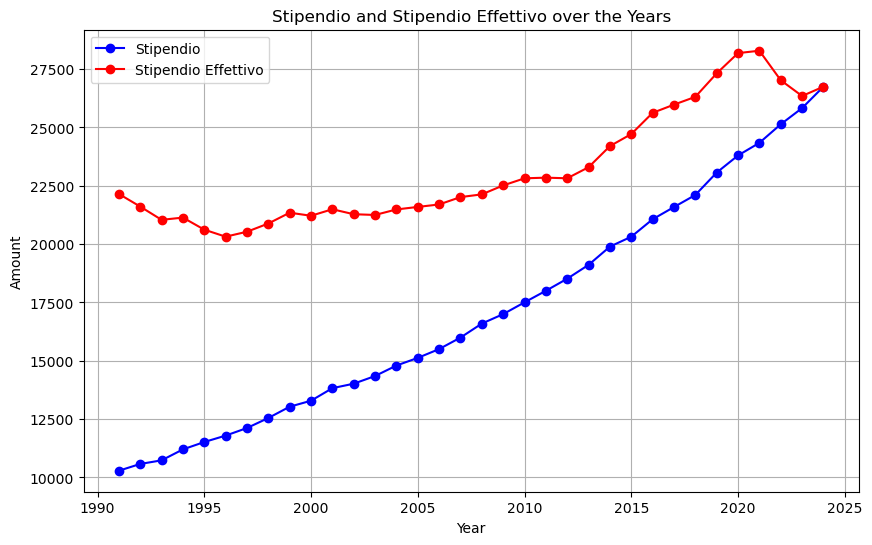

In [131]:
import matplotlib.pyplot as plt

# Extracting data for the plot
years = list(result_dict.keys())
stipendio = [result_dict[year]['stipendio'] for year in years]
stipendio_effettivo = [result_dict[year]['stipendio effettivo'] for year in years]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, stipendio, label='Stipendio', marker='o', color='blue')
plt.plot(years, stipendio_effettivo, label='Stipendio Effettivo', marker='o', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Stipendio and Stipendio Effettivo over the Years')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


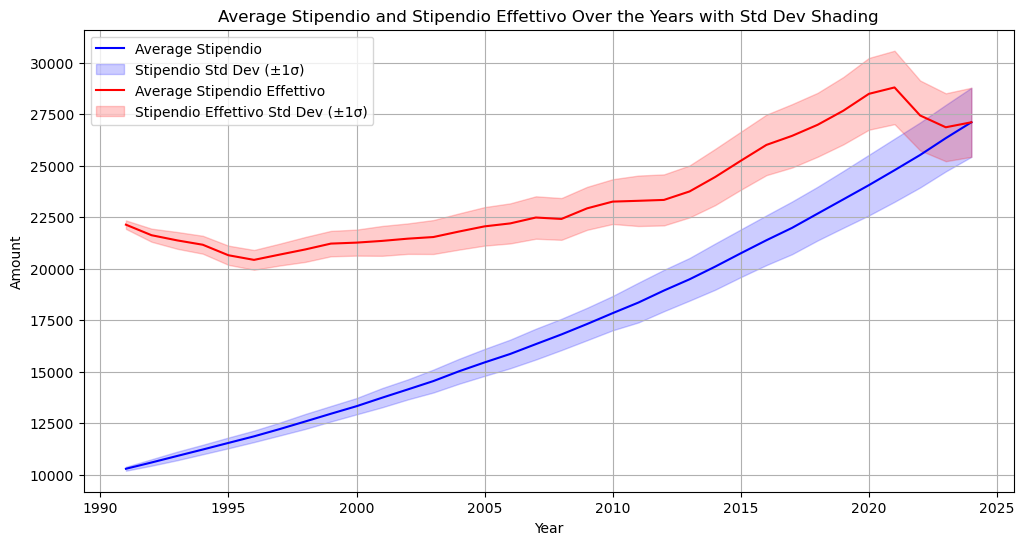

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with pandas
df = pd.read_csv('coeff_rivalu.csv')

# Define the years and other parameters
anni_list = np.arange(1991, 2025, 1)
stipendio_iniziale = 10000
crescita_media_stipendio_annuale = 3  # in percentage (3% annual growth)
varianza = 1  # in percentage (1% variance)

# Extract coeff_rivalu values for the years in anni_list
coeff_rivalu = df[df['anno'].isin(anni_list)]['coeff_rivalu'].values

# Run 50 simulations
num_simulations = 50
stipendio_all_simulations = []
stipendio_effettivo_all_simulations = []

for _ in range(num_simulations):
    # Simulate random growth coefficients for this simulation
    coeff_crescita_stipendio = 1 + np.random.normal(loc=crescita_media_stipendio_annuale / 100, 
                                                  scale=varianza / 100, size=len(anni_list))
    cumulative_product = np.cumprod(coeff_crescita_stipendio)  # Calculate the cumulative product

    # Calculate stipendio and stipendio effettivo for this simulation
    stipendio_simulation = cumulative_product * stipendio_iniziale
    stipendio_effettivo_simulation = cumulative_product * coeff_rivalu * stipendio_iniziale

    # Store the results for this simulation
    stipendio_all_simulations.append(stipendio_simulation)
    stipendio_effettivo_all_simulations.append(stipendio_effettivo_simulation)

# Convert to numpy arrays for easier handling
stipendio_all_simulations = np.array(stipendio_all_simulations)
stipendio_effettivo_all_simulations = np.array(stipendio_effettivo_all_simulations)

# Calculate the average stipendio and stipendio effettivo for each year
stipendio_mean = np.mean(stipendio_all_simulations, axis=0)
stipendio_effettivo_mean = np.mean(stipendio_effettivo_all_simulations, axis=0)

# Calculate the standard deviation (spread) around the average
stipendio_std = np.std(stipendio_all_simulations, axis=0)
stipendio_effettivo_std = np.std(stipendio_effettivo_all_simulations, axis=0)

# Plotting the average stipendio and stipendio effettivo with shading for variability
plt.figure(figsize=(12, 6))

# Plot stipendio mean and add shading (mean ± std)
plt.plot(anni_list, stipendio_mean, label='Average Stipendio', color='blue')
plt.fill_between(anni_list, stipendio_mean - stipendio_std, stipendio_mean + stipendio_std, 
                 color='blue', alpha=0.2, label='Stipendio Std Dev (±1σ)')

# Plot stipendio effettivo mean and add shading (mean ± std)
plt.plot(anni_list, stipendio_effettivo_mean, label='Average Stipendio Effettivo', color='red')
plt.fill_between(anni_list, stipendio_effettivo_mean - stipendio_effettivo_std, stipendio_effettivo_mean + stipendio_effettivo_std, 
                 color='red', alpha=0.2, label='Stipendio Effettivo Std Dev (±1σ)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Average Stipendio and Stipendio Effettivo Over the Years with Std Dev Shading')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
